<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Gowtham_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dropout
from keras.layers import Convolution2D, Dense
from keras.utils import np_utils

from keras.datasets import mnist

# Here we are loading train and test mnist dataset. Keras API makes this available. Total of 70000 images are available here.60000 and 10000 are divided between train and test images.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

There are 60000 train images with each image dimensions of width 28, height 28 and channel number is a grayscale image. So this tensor is a 3 dimentional tensor of shape (60000, 28, 28)."X_train" is the  tensor used for all the train images. 

Matplotlib is a python librray used to display on of the images among the train images.The first image is printed which is a hand written digit 5.

(60000, 28, 28)


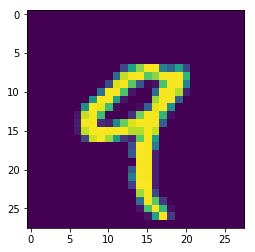

(60000, 28, 28)


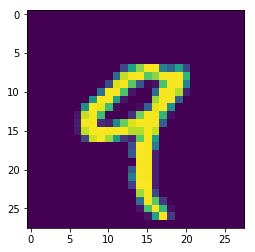

In [36]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

A 4 dimensional tensor data as input is taken by CNN model. The 1st dimension which is for applying CNN on multiple images in parallel is called a batch of images or batch size.Out of the 4 dimensions, 1st is for number of images, 2nd is for width of the image, 3rd is for height of the image, 4th is for number of channel of the image. 

As per the requirement of CNN we have to modify the X_train and X_test from 3 dimensions to 4 dimensions, using reshape operation.Once the reshape is done, the image cannot be changed and code has to be rerun.




In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The operations performed here are

1.   Input data precision is set to floating point 32 for better representation of input data and for better accuracy.
2.  The normalisation between 0 to 1 is done by dividing each pixel of the image. The normalisation is done on pixel intensity which has a range between 0 to 255.



In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train is the ouput target given for each of the 60000 mnist train data samples. In the below cell 10 of the target values are given to limit the set. We can observe that first value is a 5, which we saw earlier while printing the imput image.

In [39]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The expected neural network target format is the integer target values that are converted to a one-hot representation because for calculating catagorical cross-entropy . Since neural network predicts 10 probabilities for each image sample during forward propagation, the cross entropy is calculated by comparing it with target value for each of the 10 predicted value. Targeting one of the values and leaving all the other values, through loss function.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In the cell below, printing ten target values in one-hot representation after conversion as this is the way nueral network understand the images.

In [41]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

We have the actual model architecture in the cell below. We have three convolution layers flowed by a max pooling layer and then flowed by five convolution layers. Towards the end,we have 10 channels with dimenssions of 1x1 for each feature map. The flatten layer in the end makes the 10 channels as 10 output nodes. Applying softmax to the above will give us the prediction for the given input image.

Input shape of each image or the input channel dimension is (28, 28, 1)  with height, width and channel number respectively

In [42]:
from keras.layers import Activation, MaxPooling2D

model = Sequential()                                        #Global receptive field       | # output feature map
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))  # 3x        |       # (26,26,32)
model.add(Convolution2D(64, 3, 3, activation='relu'))                         # 5x5       |       # (24,24,64)
model.add(Convolution2D(128, 3, 3, activation='relu'))                        # 7x7       |       # (22,22,128)

model.add(MaxPooling2D(pool_size=(2, 2)))                                     # 8x8       |      # (11,11,128)

model.add(Convolution2D(256, 3, 3, activation='relu'))                        # 12x12     |      # (9,9,256)
model.add(Convolution2D(512, 3, 3, activation='relu'))                        # 16x16     |       # (7,7,512)
model.add(Convolution2D(1024, 3, 3, activation='relu'))                       # 20x20     |       # (5,5,1024)
model.add(Convolution2D(2048, 3, 3, activation='relu'))                       # 24x24     |       # (3,3,2048)
model.add(Convolution2D(10, 3, 3, activation='relu'))                         # 28x28     |       # (1,1,10)

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 2.3027 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.2696 - acc: 0.1155
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
47040/60000 [======================>.......] - ETA: 24s - loss: 2.3026 - acc: 0.0985

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [30]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
  y_pred = model.predict(X_test)

In [32]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


**What is wrong with the above network?**



*  A fully connected feed forward layer as the last layer after last Convolution layer is needed.
*   The network is has too many parameters for the given dataseta and this is leading to overfitting of the model.
*   We don't need lot of channels to represent the features for a data set like MNIST. Channel number more than 128 is not needed.
*   3 convolution layers before first max pooling are not needed since the image size is only 28x28 . Usually 1st max pooling is applied after the convolution layers have detected image to the level of edges. <br/> In the case of MNIST 28x28 images has one or two convolution layer before max pooling is enough to capture the edges.







Making above changes is giving an accuracy of 99.68% on train and 99.5% evaluation set.